In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as lg
import pandas
from sklearn.linear_model import LinearRegression

## Pridiction of house prices based on area given in the data set

The dataset is divided into 80:20 test, train split. Y contains the house prices and X contains the corresponding house price. Data is preprocessed using pandas and accuracy is tested using the sciket learn library.

Model is trained using ordinary least square linear regression method. The implementation of OLS is given in getweight function which takes X and Y values and returns the predicted weights.

In [4]:
def getWeigths(X,Y):
    return np.dot(lg.pinv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

getXY function takes a Dataframe and returns the processed X and Y values which are required for test and train dataset. 

In [5]:
def getXY(data):
    data.__delitem__("id")
    data.__delitem__("date")
    y = data.get("price")
    x= pandas.DataFrame(data["sqft_living"])
    data.__delitem__("price")
    return x,y

In [10]:
def plot(x_test,y_test,predicted_y):
    plt.plot(x_test, y_test, "bo", label="Actual")
    plt.plot(x_test, predicted_y, "r", label="Predicted")
    plt.legend()
    plt.xlabel("Area(sqrt-ft)")
    plt.ylabel("Price")
    plt.show()

Generating test and train dataset using standard 80:20 split

In [12]:
def generateTestTrainData(data):
    msk = np.random.rand(len(data)) < 0.8
    train = data[msk]
    test = data[~msk]
    return test, train

The dataset used here is the House Sales in King County, USA data which is available on kaggle.

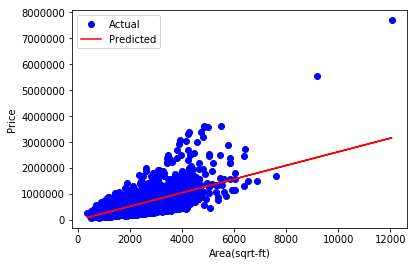

In [13]:
data = pandas.read_csv("kc_house_data.csv")
test, train =generateTestTrainData(data)
x_train,y_train=getXY(train)
x_test,y_test=getXY(test)
predicted_y=np.dot(x_test.as_matrix(), (getWeigths(x_train.as_matrix(),y_train)))
plot(x_test,y_test,predicted_y)


### Comparing the accuracy using sciket learn library

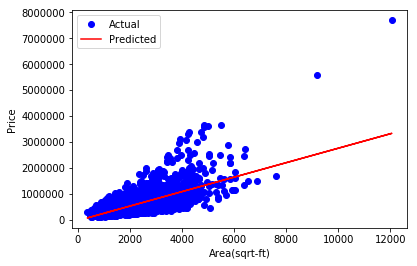

In [15]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
plot(x_test,y_test,pred)

Observation : Results generated by sciket learn is very close to manually implemented OLS